# Bond Futures Overnight Chart

## Overview

This notebook walks through recreating an interactive bond futures price chart with the following components:

- **Multiple trading days** overlaid for comparison
- **Mean and standard deviation bands** for statistical analysis
- **Time-of-day visualization** (18:00 to 17:00 next day)
- **Interactive hover data** and dynamic legend

### Use Case

Traders use this analysis to identify intraday patterns, support/resistance levels, and volatility across multiple overnight trading sessions for U.S. Treasury bond futures.

### Step 1: Import Libraries & Setup Data

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os, sys

THIS_DIR = os.getcwd()
SRC_DIR = os.path.abspath(os.path.join(THIS_DIR, '..', 'src'))
sys.path.append(SRC_DIR)
from rel_data import df_maker
tuz5_r = pd.read_csv(os.path.join(THIS_DIR, '..', 'data', 'tuz5.csv'))
tuz5 = df_maker(tuz5_r)
tyz5_r = pd.read_csv(os.path.join(THIS_DIR, '..', 'data', 'tyz5.csv'))
tyz5 = df_maker(tyz5_r)


tuz5

,Date,Price,TradingDay,TimeOfDay,WeekDay,Relative Price,DaySD,DayMean
0,45922.750000,104.257812,2025-09-22,18:00:00,Monday,0.000000,0.021992,0.011078
1,45922.753472,104.257812,2025-09-22,18:05:00,Monday,0.000000,0.021992,0.011078
2,45922.756944,104.257812,2025-09-22,18:10:00,Monday,0.000000,0.021992,0.011078
3,45922.763889,104.257812,2025-09-22,18:20:00,Monday,0.000000,0.021992,0.011078
4,45922.767361,104.257812,2025-09-22,18:25:00,Monday,0.000000,0.021992,0.011078
...,...,...,...,...,...,...,...,...
7960,45965.690972,104.179688,2025-11-03,16:35:00,Monday,0.050781,0.021992,0.011078
7961,45965.694444,104.183594,2025-11-03,16:40:00,Monday,0.054688,0.021992,0.011078
7962,45965.697917,104.183594,2025-11-03,16:45:00,Monday,0.054688,0.021992,0.011078
7963,45965.701389,104.183594,2025-11-03,16:50:00,Monday,0.054688,0.021992,0.011078


### Step 2: Input Variables

In [10]:
# Choose the ticker you want to analyze
TICKER = 'tuz5'  # options: 'tuz5', 'tyz5'
# Date or Any other filtering criteria 
START_DATE = '2025-09-25'
END_DATE = '2025-10-15'

if TICKER == 'tuz5':
    df = tuz5
elif TICKER == 'tyz5':
    df = tyz5

filtered_df = df[(df['TradingDay'] >= START_DATE) & (df['TradingDay'] <= END_DATE)].copy()

print(f"Ticker: {TICKER}")
print(f"Full data shape: {df.shape}")
print(f"Filtered data shape: {filtered_df.shape}")
print(f"\nFilter dates: {START_DATE} to {END_DATE}")

print("\nFirst 10 rows (filtered):")
display(filtered_df.head(10))

print("\nColumn names:")
print(filtered_df.columns.tolist())

print("\nUnique trading days (filtered):", filtered_df['TradingDay'].nunique())
print("\nDate range (filtered):", filtered_df['TradingDay'].min(), "to", filtered_df['TradingDay'].max())
print("\nBasic statistics (filtered):")
display(filtered_df.describe())

Ticker: tuz5
Full data shape: (7965, 8)
Filtered data shape: (3720, 8)

Filter dates: 2025-09-25 to 2025-10-15

First 10 rows (filtered):


,Date,Price,TradingDay,TimeOfDay,WeekDay,Relative Price,DaySD,DayMean
784,45925.750000,104.105469,2025-09-25,18:00:00,Thursday,0.000000,0.041322,0.003282
785,45925.753472,104.093750,2025-09-25,18:05:00,Thursday,-0.011719,0.041322,0.003282
786,45925.756944,104.113281,2025-09-25,18:10:00,Thursday,0.007812,0.041322,0.003282
787,45925.760417,104.113281,2025-09-25,18:15:00,Thursday,0.007812,0.041322,0.003282
788,45925.763889,104.093750,2025-09-25,18:20:00,Thursday,-0.011719,0.041322,0.003282
789,45925.767361,104.105469,2025-09-25,18:25:00,Thursday,0.000000,0.041322,0.003282
790,45925.770833,104.105469,2025-09-25,18:30:00,Thursday,0.000000,0.041322,0.003282
791,45925.774306,104.105469,2025-09-25,18:35:00,Thursday,0.000000,0.041322,0.003282
792,45925.777778,104.105469,2025-09-25,18:40:00,Thursday,0.000000,0.041322,0.003282
793,45925.781250,104.093750,2025-09-25,18:45:00,Thursday,-0.011719,0.041322,0.003282



Column names:
['Date', 'Price', 'TradingDay', 'TimeOfDay', 'WeekDay', 'Relative Price', 'DaySD', 'DayMean']

Unique trading days (filtered): 15

Date range (filtered): 2025-09-25 00:00:00 to 2025-10-15 00:00:00

Basic statistics (filtered):


,Date,Price,TradingDay,Relative Price,DaySD,DayMean
count,3720.000000,3720.000000,3720,3720.000000,3720.000000,3720.000000
mean,45937.202970,104.265479,2025-10-05 23:09:40.645161216,0.005854,0.035948,-0.002731
min,45925.750000,104.074219,2025-09-25 00:00:00,-0.093750,0.021992,-0.013225
25%,45932.037326,104.195312,2025-10-01 00:00:00,-0.011719,0.024054,-0.005761
50%,45937.595486,104.253906,2025-10-06 00:00:00,0.000000,0.041128,-0.005071
75%,45943.261285,104.335938,2025-10-12 00:00:00,0.015625,0.041322,0.003282
max,45946.704861,104.535156,2025-10-15 00:00:00,0.171875,0.047634,0.011078
std,6.093567,0.095934,NaN,0.038671,0.010057,0.007947


### Step 3: Data Visualization 


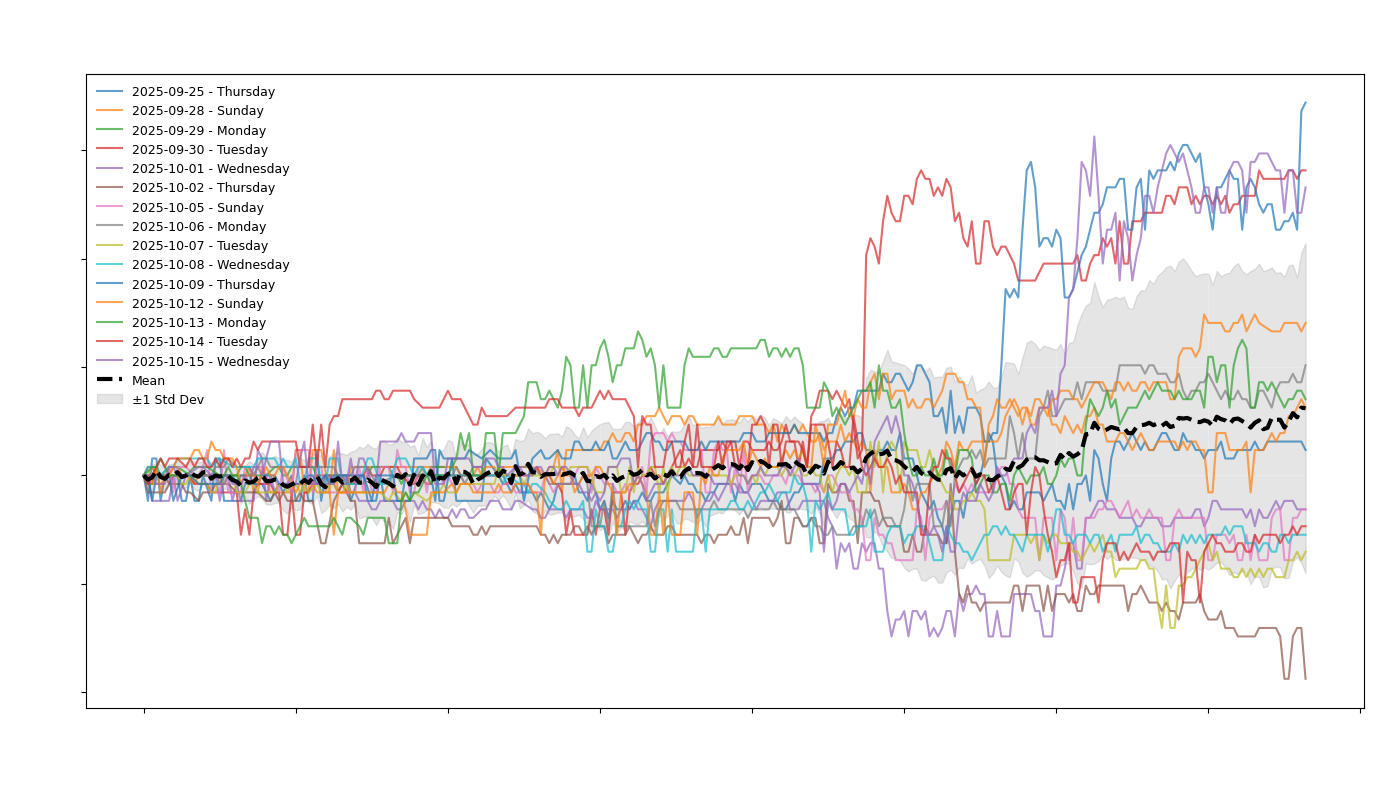

In [15]:
# Step 3: Data Visualization Via Matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Prepare time columns for plotting
filtered_df['TimeDT'] = pd.to_datetime(
    '2000-01-01 ' + filtered_df['TimeOfDay'].astype(str),
    format='%Y-%m-%d %H:%M:%S'
)

# Shift times after 18:00 to next day for continuous visualization
cutoff = pd.to_datetime('18:00:00', format='%H:%M:%S').time()
filtered_df['TimePlot'] = filtered_df['TimeDT'].apply(
    lambda ts: ts + pd.Timedelta(days=1) if ts.time() < cutoff else ts
)

# Create day labels
filtered_df['DayStr'] = filtered_df['TradingDay'].dt.strftime('%Y-%m-%d')
filtered_df['WeekDay'] = filtered_df['TradingDay'].dt.day_name()
filtered_df['DayLabel'] = filtered_df['DayStr'] + ' - ' + filtered_df['WeekDay']

# Get unique days
selected_days = sorted(filtered_df['DayLabel'].unique().tolist())

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8), facecolor="#ffffff")
ax.set_facecolor("#ffffff")

# Plot each trading day as a separate line
colors = plt.cm.tab10(range(len(selected_days)))
for idx, label in enumerate(selected_days):
    day_df = filtered_df[filtered_df['DayLabel'] == label].sort_values('TimePlot')
    ax.plot(day_df['TimePlot'], day_df['Relative Price'], 
            label=label, alpha=0.7, linewidth=1.5, color=colors[idx % 10])

# Calculate mean and standard deviation
grouped = filtered_df.groupby('TimePlot')['Relative Price'].agg(['mean', 'std']).reset_index()
grouped.columns = ['TimePlot', 'Mean', 'StdDev']
grouped['StdDev'] = grouped['StdDev'].fillna(0)
grouped['Upper_Band'] = grouped['Mean'] + grouped['StdDev']
grouped['Lower_Band'] = grouped['Mean'] - grouped['StdDev']

# Plot mean line
ax.plot(grouped['TimePlot'], grouped['Mean'], 
        label='Mean', color='black', linewidth=3, linestyle='--', zorder=5)

# Plot standard deviation band (shaded area)
ax.fill_between(grouped['TimePlot'], grouped['Lower_Band'], grouped['Upper_Band'], 
                alpha=0.2, color='gray', label='±1 Std Dev')

# Formatting
ax.set_xlabel('Time (18:00–17:59 Next Day)', fontsize=12, color='white')
ax.set_ylabel('Relative Price', fontsize=12, color='white')
ax.set_title(f'{TICKER.upper()} Intraday Price Analysis\n({START_DATE} to {END_DATE})', 
             fontsize=14, fontweight='bold', color='white', pad=20)

# Format x-axis to show time only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Grid
ax.grid(True, alpha=0.2, color='white')

# Legend
ax.legend(loc='upper left', fontsize=9, framealpha=0.9, facecolor="#ffffff", edgecolor='white')

# Tight layout
plt.tight_layout()

# Display
plt.show()
